In [15]:
import pandas as pd

# Read the CSV files into DataFrames
customers_df = pd.read_csv("Customers.csv")
products_df = pd.read_csv("Products.csv")
transactions_df = pd.read_csv("Transactions.csv")

# Display the first few rows of each DataFrame for inspection
customers_df.head(), products_df.head(), transactions_df.head()



(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  2024-04-25 07:38:55    

In [23]:
# summary of datasets
customers_summary = customers_df.info(), customers_df.describe(include='all')
products_summary = products_df.info(), products_df.describe(include='all')
transactions_summary = transactions_df.info(), transactions_df.describe(include='all')

# Checking for missing values in all datasets
missing_values = {
    "Customers": customers_df.isnull().sum(),
    "Products": products_df.isnull().sum(),
    "Transactions": transactions_df.isnull().sum()
}

customers_summary, products_summary, transactions_summary, missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


((None,
         CustomerID      CustomerName         Region  SignupDate
  count         200               200            200         200
  unique        200               200              4         179
  top         C0001  Lawrence Carroll  South America  2024-11-11
  freq            1                 1             59           3),
 (None,
         ProductID            ProductName Category       Price
  count        100                    100      100  100.000000
  unique       100                     66        4         NaN
  top         P001  ActiveWear Smartwatch    Books         NaN
  freq           1                      4       26         NaN
  mean         NaN                    NaN      NaN  267.551700
  std          NaN                    NaN      NaN  143.219383
  min          NaN                    NaN      NaN   16.080000
  25%          NaN                    NaN      NaN  147.767500
  50%          NaN                    NaN      NaN  292.875000
  75%          NaN         

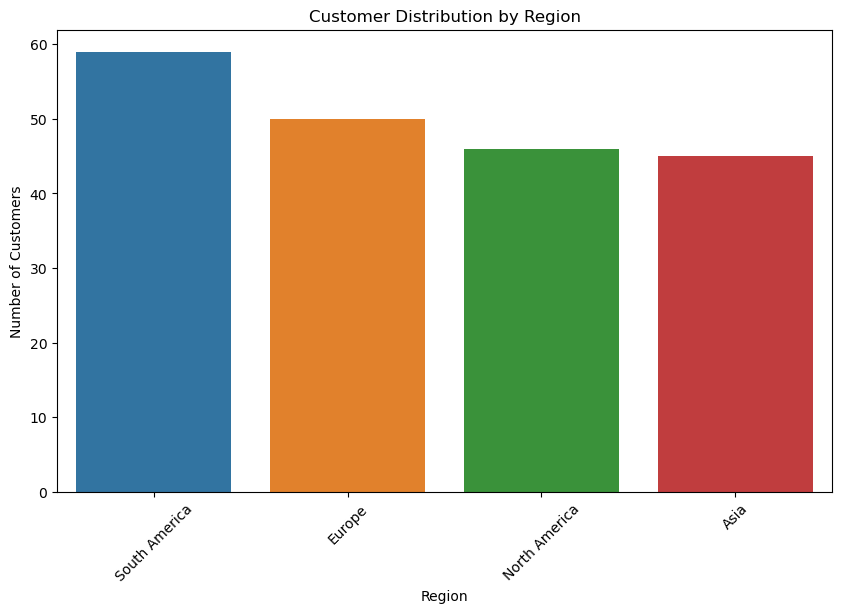

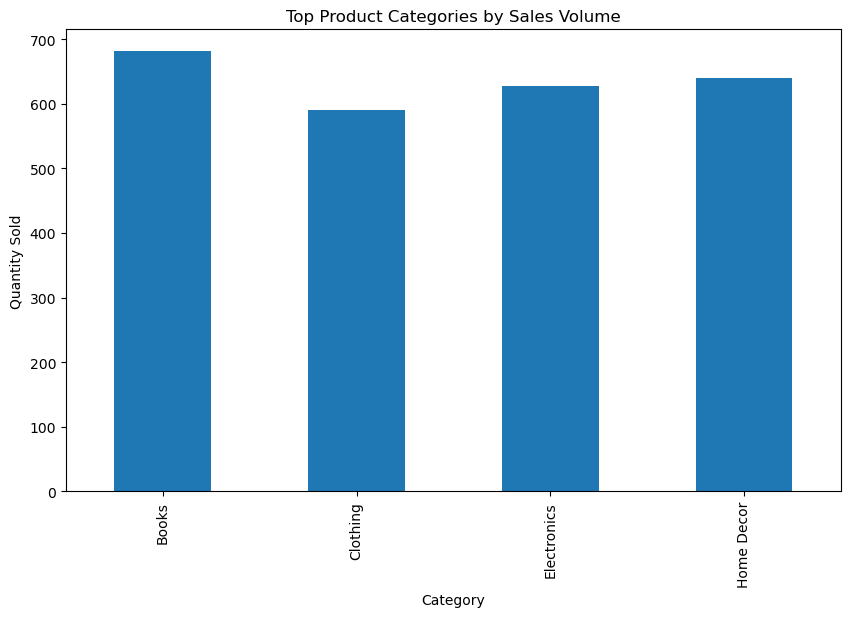

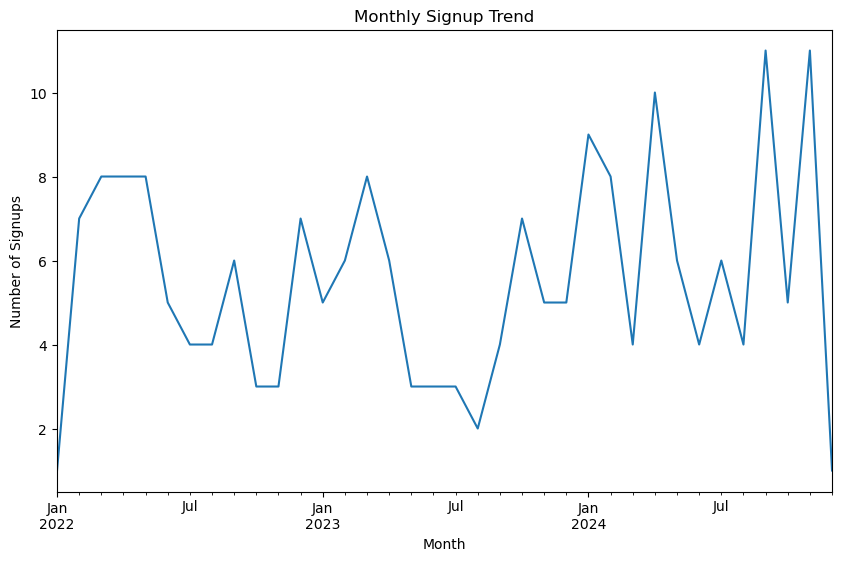

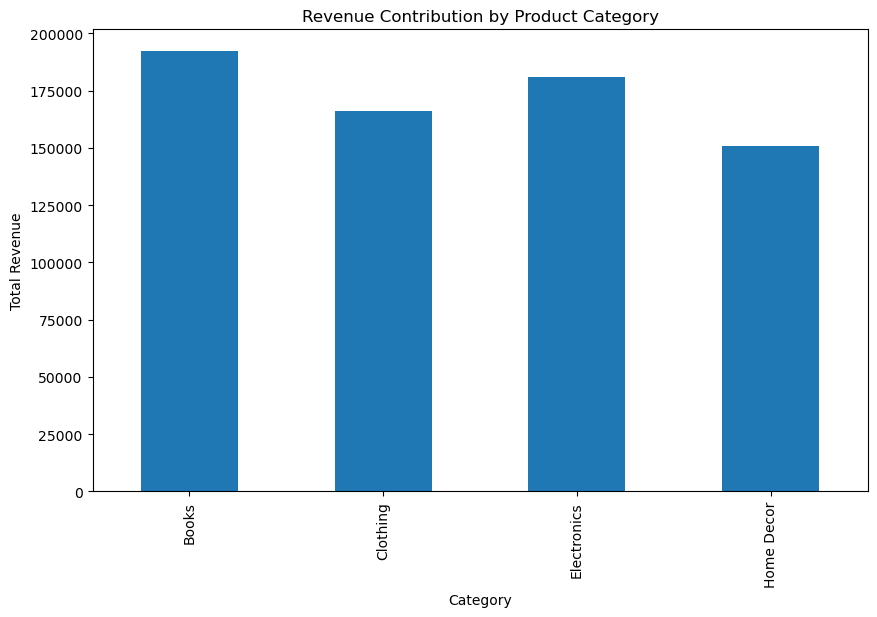

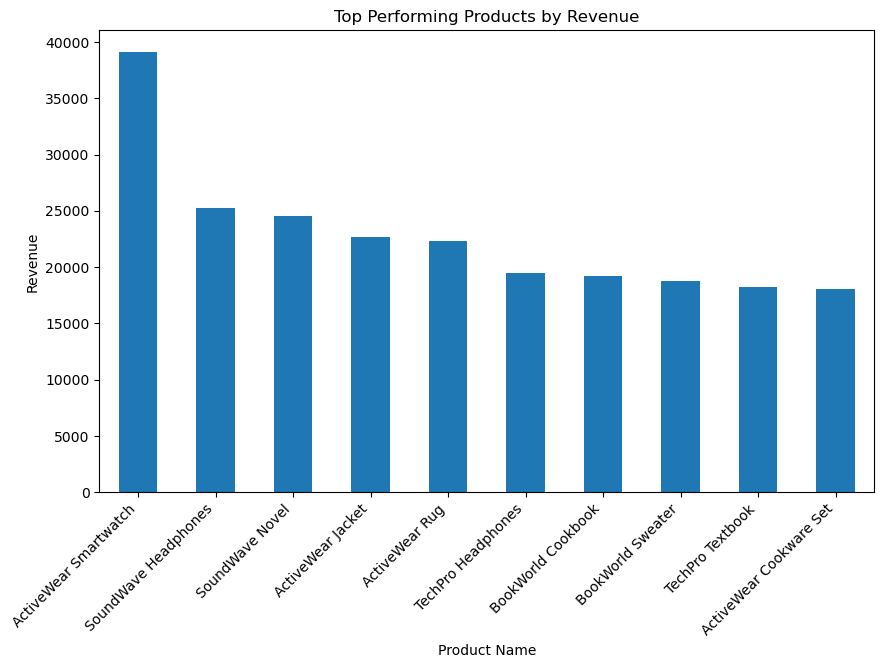

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date columns to datetime format for analysis
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# EDA 1: Distribution of Customers by Region
region_counts = customers_df['Region'].value_counts()

# EDA 2: Top Product Categories by Sales Volume
merged_transactions = transactions_df.merge(products_df, on="ProductID")
category_sales = merged_transactions.groupby("Category")["Quantity"].sum()

# EDA 3: Monthly Signup Trend
customers_df['SignupMonth'] = customers_df['SignupDate'].dt.to_period('M')
monthly_signups = customers_df['SignupMonth'].value_counts().sort_index()

# EDA 4: Revenue Contribution by Product Category
category_revenue = merged_transactions.groupby("Category")["TotalValue"].sum()

# EDA 5: Top Performing Products by Revenue
product_revenue = merged_transactions.groupby("ProductName")["TotalValue"].sum().sort_values(ascending=False).head(10)

# Visualizations
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', title="Top Product Categories by Sales Volume", xlabel="Category", ylabel="Quantity Sold")
plt.show()

plt.figure(figsize=(10, 6))
monthly_signups.plot(kind='line', title="Monthly Signup Trend", xlabel="Month", ylabel="Number of Signups")
plt.show()

plt.figure(figsize=(10, 6))
category_revenue.plot(kind='bar', title="Revenue Contribution by Product Category", xlabel="Category", ylabel="Total Revenue")
plt.show()

plt.figure(figsize=(10, 6))
product_revenue.plot(kind='bar', title="Top Performing Products by Revenue", xlabel="Product Name", ylabel="Revenue")
plt.xticks(rotation=45, ha='right')
plt.show()
